# Sentiment Analysis

Sentiment analysis is one of the emerging applications of AI that helps extract sentiments in large volumes of text. This project will look at how companies can leverage this technique in analyzing customers' reviews, enabling management to gather feedback and develop products accordingly. So instead of traditional review questionnaires, which are often costly and time-consuming, social media can provide a cost-effective source of textual data that reflects customers' opinions about products.

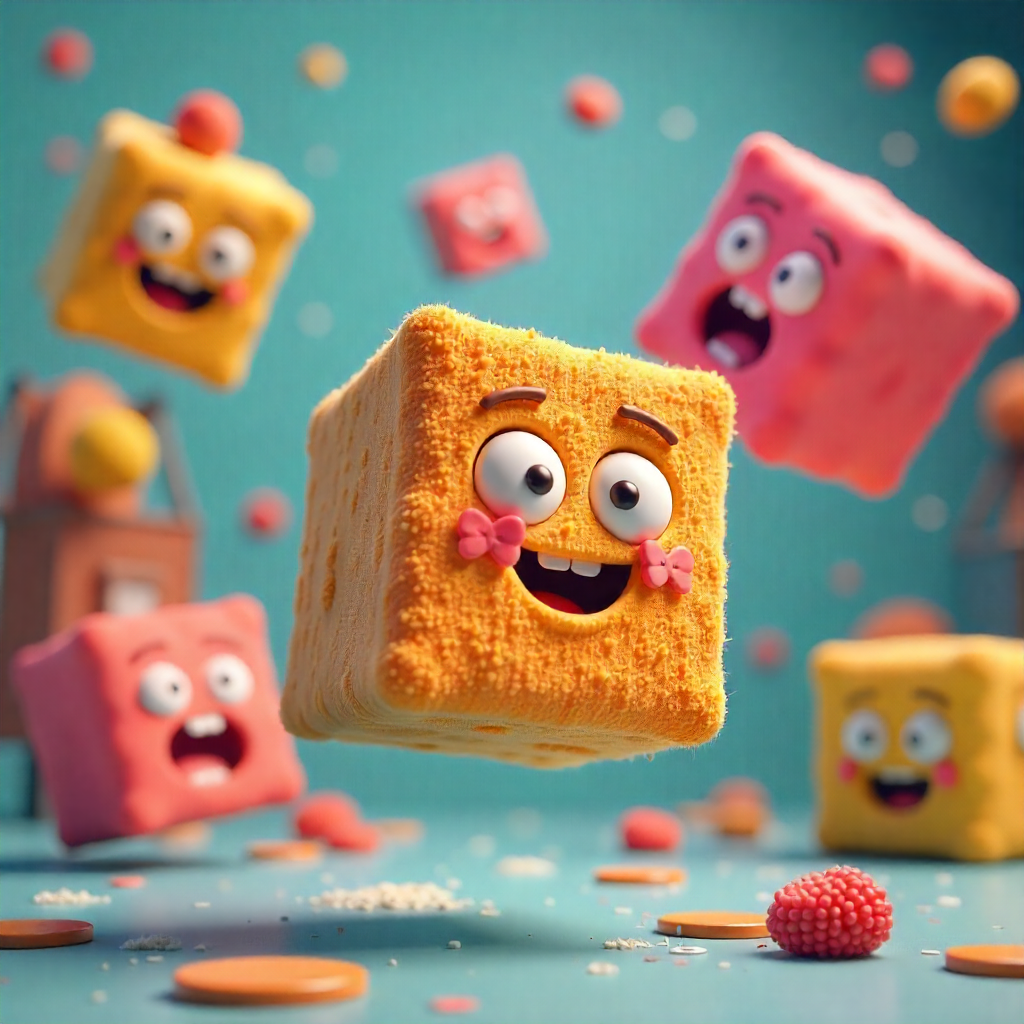

# Import Libraries 

In [1]:
import pandas as pd #for data manipulation
import numpy as np #for math calculations
import nltk  #Natural Language Toolkit
import re # for text cleaning

# Import Data

In [2]:
df= pd.read_csv(r'C:\Users\m\OneDrive\Desktop\datasets\ecommerce_product_review.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


In this dataset of client reviews on an e-commerce platform (Amazon), there are numerous variables. However, for our sentiment analysis project, we will only need the "reviewText" variable. 

You can find the dataset at: https://www.kaggle.com/datasets/mehmetisik/amazon-review/data

# Missing Values Check

In [3]:
df.isna().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [4]:
df= df.dropna(subset=["reviewText"])

In [5]:
df.isna().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

Now that we have no missing values in our reviews, we can start the cleaning process. 

# Text Cleaning 

In [6]:
#Step 1: download data cleaning resources 
nltk.download("vader_lexicon") 
nltk.download("punkt") #for Tokenization 
nltk.download("wordnet") #a large lexical database of English built at Princeton University 
nltk.download("stopwords") #words like "the", "this", "a", which aren't so meaningful
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #bringing words to their base words, i.e, "plays", "player", their base word is "play"
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Vader, or "Valence Dictionary and Sentiment Reasoner," is an NLTK tool designed to analyze text, especially informal texts like social media content, making it suitable for analyzing product reviews.
- A lemmatizer is a type of canonicalization that simplifies words by reducing them to their base form. i.e, "plays, players, played" refer to the same action, which is "play". Another type of canonicalization is stemming. However, lemmatizers, despite being computationally expensive, result in more meaningful base words.\
For example, the base word of "Communication", with: \
Stemming is: *Commun* (not a valid word)\
Lemmatizer is: *Communication* (a valid word) 
- Sentiment Intensity Analyzer will help us classify reviews as positive, neutral, and negative.

In [7]:
# Step 2: Initialize Tools
stop_words= set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()
sia= SentimentIntensityAnalyzer()
#Step 3: (Optional) define a new word lexicon for better accuracy 
new_words = {
    'outstanding': 3.0,
    'terrible':-3.0,
    'waste':-2.5,
    'excellent':2.5,
    'refund':-2.0
}
sia.lexicon.update(new_words)
#Step 4: Define a cleaning function
def clean_reviews(text):
    if not isinstance(text,str):
        return " "#make sure reviews are string or consider them as NaN
        
    text = text.lower() #letter lowercase
    text = re.sub(r"&[a-z]+;"," ", text) #remove HTML entities which are usually used by websites to store text, like "&amp;", "nbsp"
    text= re.sub(r"[^a-z\s]"," ", text) #remove anything that is not a letter or space (like: numbers, punctuation...)
    tokens= nltk.word_tokenize(text)
    tokens= [t for t in tokens if (t not in stop_words or t in ['no','not','never'])and len(t)>2] #remove stop_words and very short words,i.e, (am,in..)
    tokens= [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)
#Step 5: Apply cleaning function 
df['cleaned_review']= df['reviewText'].apply(clean_reviews)

    

Tokenization is one of the key processes in Sentiment Analysis. It is based on splitting the whole text into separate elements that make sense (words, sentences...). This way, computers can better understand texts and extract different sentiments in them. For example, we lemmatize reviews after tokenization because that will facilitate finding the words that need to be lemmatized, like in this review, *"camera works well"*, when it is tokenized:\
**before lemmatization:** 'camera' 'works' 'well'\
**after lemmatization:** 'camera' 'work' 'well'

# Sentiments Analysis For Customer Reviews

In [8]:
#Step 6: Classify reviews (positive, neutral, negative)
def get_sentiment(text):
    score= sia.polarity_scores(text)['compound']
    if score >=0.3:
        return "positive"
    elif score <=-0.3:
        return "negative"
    else:
        return "neutral"
df['sentiment']= df['cleaned_review'].apply(get_sentiment)
#Step 7: Count the reviews for each sentiment
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)                

sentiment
positive    3451
neutral     1008
negative     455
Name: count, dtype: int64


# Customer Sentiments Bar Chart 

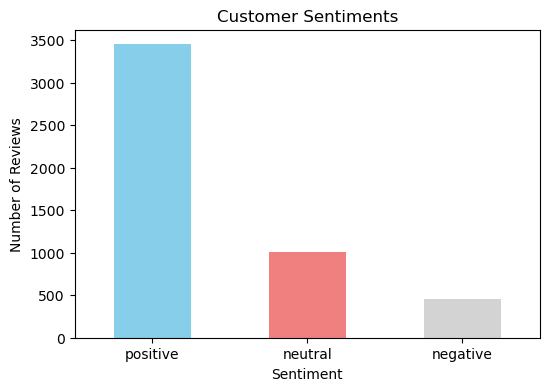

In [9]:
#Step 8: Visualize sentiments
import matplotlib.pyplot as plt
#set figure size 
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar',color=['skyblue', 'lightcoral' ,'lightgray'])
plt.title("Customer Sentiments")
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# Customer Sentiments Pie Chart

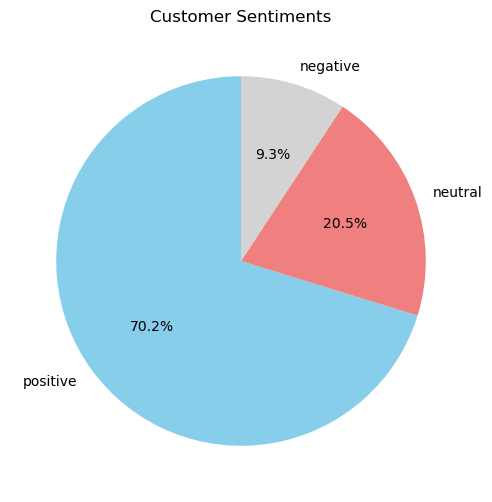

In [14]:
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels= sentiment_counts.index,
    autopct = "%1.1f%%",#show percentage with 1 decimal
    startangle=90,
    colors=['skyblue','lightcoral','lightgray']
)
plt.title("Customer Sentiments")
plt.show()
    
    

From both the bar chart and the pie chart, we can see that most reviews are positive, making up  over 70 % ( 3451 reviews). Then, come neutral reviews with around 20.5% (1008 reviews), while negative reviews account for only 9.3% (455 reviews).